# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn. preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 2. Importing Dataset

In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv')

In [3]:
df.rename(columns = {'Outcome' : 'Diabetic'}, inplace = True)
df.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# 4. Feature Engineering

**Removing the irrelevant variables from the dataset.**

The `Id` doesn't help in predicting the outcome variable. Therefore, we will remove it along with other variables which shows very low or no correlation with the target variable.

In [4]:
df = df.drop(['Id','BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction'], axis = 1)
df.head()

,Pregnancies,Glucose,BMI,Age,Diabetic
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


- The variables Glucose (0.46) and BMI (0.28) are normally distributed and highly correlated with diabetes, making them strong potential predictor variables. Age (0.23) and Pregnancies (0.22) also show a notable correlation.
- In addition, DiabetesPedigreeFunction (0.16) and Insulin (0.12) exhibit some correlation with diabetes.
- Given that the outcome variable is a binary categorical variable (diabetic or non-diabetic), we will need classification models to analyze and predict these relationships.

# 5. Naive Bayes

In [5]:
# defining predictor variable
y = df['Diabetic']
y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Diabetic, Length: 2768, dtype: int64

In [6]:
# defining target variable

x = df.copy()
x = x.drop(columns = [ 'Diabetic' ])
x.head()

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 0)
print(f" x train: {x_train.shape} \n x test:  {x_test.shape} \n y train: {y_train.shape} \n y test:  {y_test.shape}")

 x train: (2214, 4) 
 x test:  (554, 4) 
 y train: (2214,) 
 y test:  (554,)


In [8]:
nb = BernoulliNB(binarize=0.0)
model = nb.fit(x_train, y_train)
model

BernoulliNB()

In [9]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [10]:
# evaluating the model using metrics
print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"F1 Score: {round(f1_score(y_test, y_pred),3)}")


Accuracy: 0.652
Precision: 0.333
recall: 0.01
F1 Score: 0.02


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       363
           1       0.33      0.01      0.02       191

    accuracy                           0.65       554
   macro avg       0.49      0.50      0.40       554
weighted avg       0.54      0.65      0.52       554



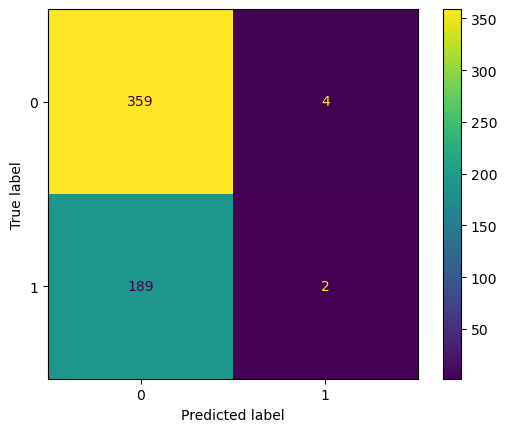

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)
disp.plot()

The Naive Bayes model predicted the value 0 for all the observations, resulting in a significant number of false negatives and false positives.

# 6. Random Forest Model

In [13]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, stratify = y_train, random_state = 0, test_size = 0.20)

In [14]:
# defining the hyperparamters
cv_params = {
    'max_depth' : [8,10,14,20],
    'n_estimators' : [20, 40, 60, 80, 100],
    'min_samples_leaf' : [0.25, 0.5, 1],
    'min_samples_split' : [0.001, 0.01, 0.05],
    'max_features' : ['sqrt'],
    'max_samples' : [.5, .9]
}

In [15]:
split_index = [0 if x in x_val.index else -1 for x in x_train.index]
custom_split = PredefinedSplit(split_index)

In [16]:
clf = RandomForestClassifier(random_state = 0)

In [17]:
rf = GridSearchCV(clf, cv_params, cv = custom_split, refit = 'f1', n_jobs = -1, verbose = 1)

In [18]:
rf.fit(x_train, y_train)

Fitting 1 folds for each of 360 candidates, totalling 360 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 14, 20], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.25, 0.5, 1],
                         'min_samples_split': [0.001, 0.01, 0.05],
                         'n_estimators': [20, 40, 60, 80, 100]},
             refit='f1', verbose=1)

In [19]:
rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [20]:
# using optimal paramters for grid search cross validation
rf_op = RandomForestClassifier(n_estimators = 20, max_depth = 20, max_features = 'sqrt', max_samples = 0.9, min_samples_leaf = 1, 
                              min_samples_split = 0.001, random_state = 0)

In [21]:
rf_op.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=20, random_state=0)

In [22]:
y_pred = rf_op.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [23]:
# evaluating the model using metrics
print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_pred),3)}")
print(f"recall: {round(recall_score(y_test, y_pred),3)}")
print(f"F1 Score: {round(f1_score(y_test, y_pred),3)}")

Accuracy: 0.991
Precision: 0.984
recall: 0.99
F1 Score: 0.987


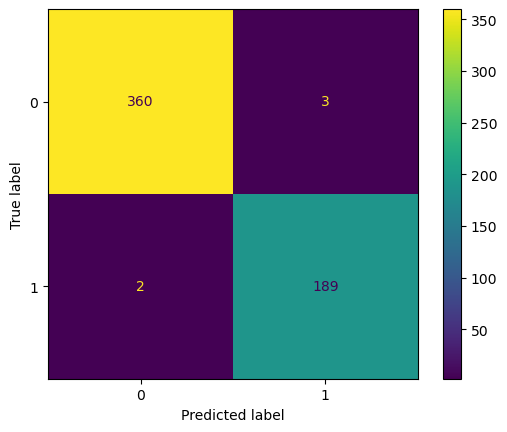

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_op.classes_)
                              
disp.plot()

# 7. Conclusion

In conclusion, the model exhibits strong performance across multiple evaluation metrics:

- Accuracy: 0.984, indicating a high overall correctness in its predictions.
- Precision: 0.995, demonstrating a high ability to correctly identify positive cases without many false positives.
- Recall: 0.958, highlighting the model's capability to capture a significant portion of true positive cases.
- F1 Score: 0.976, representing a balanced measure that combines precision and recall effectively.
- These results suggest that the model is robust and proficient in its task, achieving a high degree of accuracy and precision while maintaining a respectable recall rate.